In [ ]:
!unzip /content/drive/MyDrive/GTSRB-Test/BelgiumTSC_Testing.zip -d /content/BelgiumTSC_Testing

Archive:  /content/drive/MyDrive/GTSRB-Test/BelgiumTSC_Testing.zip
   creating: /content/BelgiumTSC_Testing/Testing/
   creating: /content/BelgiumTSC_Testing/Testing/00000/
  inflating: /content/BelgiumTSC_Testing/Testing/00000/00017_00000.ppm  
  inflating: /content/BelgiumTSC_Testing/Testing/00000/00017_00001.ppm  
  inflating: /content/BelgiumTSC_Testing/Testing/00000/00017_00002.ppm  
  inflating: /content/BelgiumTSC_Testing/Testing/00000/00021_00000.ppm  
  inflating: /content/BelgiumTSC_Testing/Testing/00000/00021_00001.ppm  
  inflating: /content/BelgiumTSC_Testing/Testing/00000/00021_00002.ppm  
  inflating: /content/BelgiumTSC_Testing/Testing/00000/GT-00000.csv  
   creating: /content/BelgiumTSC_Testing/Testing/00001/
  inflating: /content/BelgiumTSC_Testing/Testing/00001/00252_00000.ppm  
  inflating: /content/BelgiumTSC_Testing/Testing/00001/00252_00001.ppm  
  inflating: /content/BelgiumTSC_Testing/Testing/00001/00252_00002.ppm  
  inflating: /content/BelgiumTSC_Testing/Tes

In [ ]:
!unzip /content/drive/MyDrive/GTSRB-Test/BelgiumTSC_Training.zip -d /content/BelgiumTSC_Training

Archive:  /content/drive/MyDrive/GTSRB-Test/BelgiumTSC_Training.zip
   creating: /content/BelgiumTSC_Training/Training/
   creating: /content/BelgiumTSC_Training/Training/00000/
  inflating: /content/BelgiumTSC_Training/Training/00000/01153_00000.ppm  
  inflating: /content/BelgiumTSC_Training/Training/00000/01153_00001.ppm  
  inflating: /content/BelgiumTSC_Training/Training/00000/01153_00002.ppm  
  inflating: /content/BelgiumTSC_Training/Training/00000/01160_00000.ppm  
  inflating: /content/BelgiumTSC_Training/Training/00000/01160_00001.ppm  
  inflating: /content/BelgiumTSC_Training/Training/00000/01160_00002.ppm  
  inflating: /content/BelgiumTSC_Training/Training/00000/01797_00000.ppm  
  inflating: /content/BelgiumTSC_Training/Training/00000/01797_00001.ppm  
  inflating: /content/BelgiumTSC_Training/Training/00000/01797_00002.ppm  
  inflating: /content/BelgiumTSC_Training/Training/00000/01798_00000.ppm  
  inflating: /content/BelgiumTSC_Training/Training/00000/01798_00001.ppm

In [ ]:
!rm /content/BelgiumTSC_Testing/Testing/Readme.txt

In [ ]:
!rm /content/BelgiumTSC_Training/Training/Readme.txt

Importing Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
import cv2
import tensorflow
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Declare and Assign variables

In [ ]:
# Assigning data path
train_path = '/content/BelgiumTSC_Training/Training'

# Resizing the images to 30x30x3
height = 30
width = 30
channels = 3

#find total classes in training set
NUM_CATEGORIES = len(os.listdir(train_path)) 
NUM_CATEGORIES

lst = os.listdir(train_path)
lst.sort()

Training Set Preparation

In [ ]:
# Declaring data and labels

data = []
labels = []

for i in range(NUM_CATEGORIES):
    path = train_path + '/' + str(lst[i])
    images = os.listdir(path)

    for img in images:
        if img.endswith(".ppm"):
          try:
              image = cv2.imread(path + '/' + img)
              image = cv2.resize(image,(height,width))
              data.append(image)
              labels.append(i)
          except:
              print("Error: " + img)

# Changing the list to numpy array

data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(4575, 30, 30, 3) (4575,)


Split Training Set

In [ ]:
#Split Train Test dataset
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(data,labels,test_size=0.2,random_state=1,shuffle=True)

#normalize input between 0 - 1
#X_train = X_train/255 
#X_test = X_test/255

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(3660, 30, 30, 3) (915, 30, 30, 3) (3660,) (915,)


One Hot Encoding

In [ ]:
#one hot encoding
Y_train=to_categorical(Y_train,NUM_CATEGORIES)
Y_test=to_categorical(Y_test,NUM_CATEGORIES)

print(Y_train.shape,Y_test.shape)

(3660, 62) (915, 62)


Model Building

In [ ]:
# Building model

model = Sequential()

model.add(BatchNormalization(input_shape=(height,width,channels)))
model.add(Activation('relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(2,2)))

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3)))

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=48, kernel_size=(3,3)))

model.add(MaxPool2D(pool_size=(2, 2))) 
model.add(Dropout(rate=0.25))

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=48, kernel_size=(3,3)))

model.add(MaxPool2D(pool_size=(2, 2))) 
model.add(Dropout(rate=0.25))

model.add(BatchNormalization())
model.add(Activation('relu')) 

model.add(Flatten()) 
model.add(Dense(512)) 

model.add(BatchNormalization()) 
model.add(Activation('relu')) 
model.add(Dropout(rate=0.5)) 
model.add(Dense(NUM_CATEGORIES, activation='softmax')) 

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 30, 30, 3)         12        
_________________________________________________________________
activation (Activation)      (None, 30, 30, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 32)        1

Model Compiling

In [ ]:
# Compiling model
from keras.optimizers import Adam
opt = Adam(learning_rate=0.1)
#model.compile(loss = "categorical_crossentropy",optimizer=opt,metrics =['accuracy'])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Data Augmentation

In [ ]:
# Data Augmentation - to increase model accuracy

aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

Model Fitting

In [ ]:
batch_size = 32
epochs = 50

history = model.fit(aug.flow(X_train,Y_train,batch_size=batch_size),
                    epochs=epochs, validation_data=(X_test, Y_test))


Epoch 1/50
115/115 [==============================] - 8s 61ms/step - loss: 3.5148 - accuracy: 0.1883 - val_loss: 3.5134 - val_accuracy: 0.2481
Epoch 2/50
115/115 [==============================] - 7s 59ms/step - loss: 2.7189 - accuracy: 0.3202 - val_loss: 2.8186 - val_accuracy: 0.3858
Epoch 3/50
115/115 [==============================] - 7s 59ms/step - loss: 2.1860 - accuracy: 0.4295 - val_loss: 2.0487 - val_accuracy: 0.4820
Epoch 4/50
115/115 [==============================] - 7s 58ms/step - loss: 1.8547 - accuracy: 0.5016 - val_loss: 1.5432 - val_accuracy: 0.6044
Epoch 5/50
115/115 [==============================] - 7s 58ms/step - loss: 1.6048 - accuracy: 0.5538 - val_loss: 1.1884 - val_accuracy: 0.6721
Epoch 6/50
115/115 [==============================] - 6s 56ms/step - loss: 1.4109 - accuracy: 0.6014 - val_loss: 1.0270 - val_accuracy: 0.7016
Epoch 7/50
115/115 [==============================] - 6s 56ms/step - loss: 1.2615 - accuracy: 0.6464 - val_loss: 0.8141 - val_accuracy: 0.7388

Graph Visualization

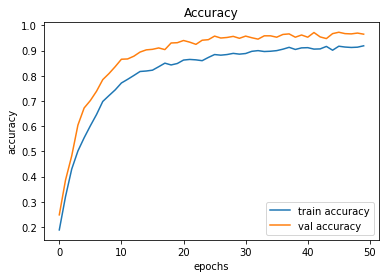

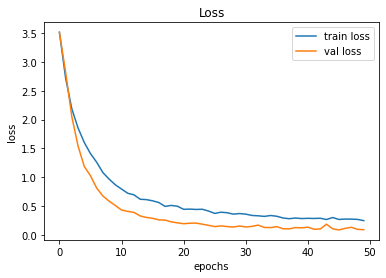

In [ ]:
# plotting graphs for accuracy and loss

plt.figure(0)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Test Set Preparation

In [ ]:
# Assigning data path
test_path = '/content/BelgiumTSC_Testing/Testing'

# Declaring data and labels

data = []
labels = []

for i in range(NUM_CATEGORIES):
    path = test_path + '/' + str(lst[i])
    images = os.listdir(path)

    for img in images:
        if img.endswith(".ppm"):
          try:
              image = cv2.imread(path + '/' + img)
              image = cv2.resize(image,(height,width))
              data.append(image)
              labels.append(i)
          except:
              print("Error: " + img)

# Changing the list to numpy array

data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(2520, 30, 30, 3) (2520,)


Model Prediction

In [ ]:
predict = np.argmax(model.predict(data), axis = -1)
predict

array([ 0,  0,  0, ..., 61, 61, 61])

Test Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score
print('Test Data accuracy: ',accuracy_score(labels, predict)*100)

Test Data accuracy:  97.02380952380952


Save Model and History

In [ ]:
!sudo pip install h5py

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("default-BelgiumTS-model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("default-BelgiumTS-model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
import pickle 
pickle_out = open("BelgiumTS-hist-acc.pkl", mode = "wb") 
pickle.dump(history.history['accuracy'], pickle_out) 
pickle_out.close()

In [ ]:
pickle_out = open("BelgiumTS-hist-val-acc.pkl", mode = "wb") 
pickle.dump(history.history['val_accuracy'], pickle_out)
pickle_out.close()

In [ ]:
pickle_out = open("BelgiumTS-hist-loss.pkl", mode = "wb") 
pickle.dump(history.history['loss'], pickle_out)
pickle_out.close()

In [ ]:
pickle_out = open("BelgiumTS-hist-val-loss.pkl", mode = "wb") 
pickle.dump(history.history['val_loss'], pickle_out)
pickle_out.close()

Upload Model and History to Google Drive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  

In [ ]:
file = drive.CreateFile()
file.SetContentFile('default-BelgiumTS-model.json')
file.Upload()

In [ ]:
file = drive.CreateFile()
file.SetContentFile('default-BelgiumTS-model.h5')
file.Upload()

In [ ]:
file = drive.CreateFile()
file.SetContentFile('BelgiumTS-hist-acc.pkl')
file.Upload()

In [ ]:
file = drive.CreateFile()
file.SetContentFile('BelgiumTS-hist-val-acc.pkl')
file.Upload()

In [ ]:
file = drive.CreateFile()
file.SetContentFile('BelgiumTS-hist-loss.pkl')
file.Upload()

In [ ]:
file = drive.CreateFile()
file.SetContentFile('BelgiumTS-hist-val-loss.pkl')
file.Upload()